# Exploration 15. 문자를 읽을 수 있는 딥러닝

## 프로젝트 : 다양한 OCR모델 비교하기
* 본 과제를 통해 OCR 기능을 활용한 서비스를 기획함과 동시에 아래 세 가지 OCR 모델의 성능을 검증한다.
  * Google OCR API
  * keras-ocr
  * Tesseract
* 본 과제를 통해 간판 이미지의 문자 인식 기능을 사용하여 위치를 안내하는 서비스를 구현하려고 한다.

## 루브릭 평가 기준
|평가문항|평가문항|
|:-----|:-----|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## Keras-OCR 모델 테스트

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [24]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://i.ibb.co/MPtygc6/IMG-0997.jpg',
  'https://i.ibb.co/Nj4Sw0h/IMG-1012.jpg',
  'https://i.ibb.co/H21HxcW/IMG-1054.jpg',
  'https://i.ibb.co/QprY9hZ/IMG-1553.jpg',
  'https://i.ibb.co/g60KMkw/IMG-4234.jpg', 
  'https://i.ibb.co/3rBSdYj/IMG-4696.jpg', 
  'https://i.ibb.co/Q9PYdQS/IMG-9978.jpg', 
  'https://i.ibb.co/5KRpzCQ/IMG-4353.jpg', 
  'https://i.ibb.co/yyhpr6M/IMG-2290.jpg', 
  'https://i.ibb.co/ts9Hrsn/IMG-2170.jpg', 
  'https://i.ibb.co/vQggJgr/IMG-8127.jpg',
  'https://i.ibb.co/njmXJWG/IMG-0068.jpg', 
  'https://i.ibb.co/Q9PYdQS/IMG-9978.jpg'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

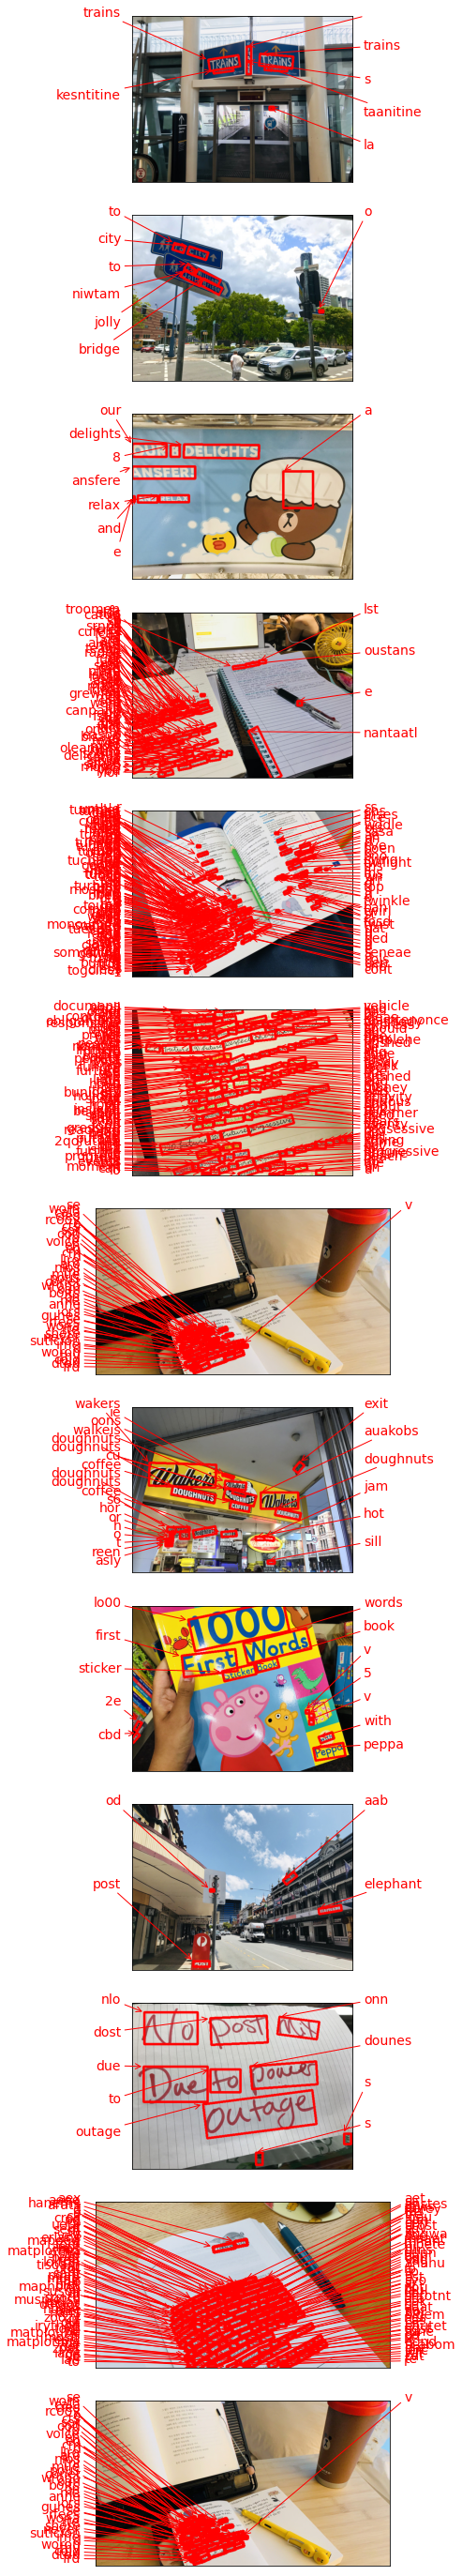

In [25]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Tesseract OCR 모델 테스트

In [1]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/IMG_0997.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png


In [6]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

. | j : , | | ” ; \ _ i - : : yr : E 7 7

ae -_ | us

(“y

) airtray

Sesh ale,

peak ee 7

*ian


i

en

5

i

i


ny eA

= ; i :

Done


## Google OCR API 테스트

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/ocr_python/IMG_0997.jpeg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

total 56104
-rw-r--r-- 1 root root   889842 Feb 15 11:58  ChatBotData.csv
-rw-r--r-- 1 root root    98037 Jan 11 14:38 '[E-01]RockPaperScissor.ipynb'
-rw-r--r-- 1 root root    26622 Jan 13 08:42 '[E-02] load_breast_cancer.ipynb'
-rw-r--r-- 1 root root    24854 Jan 13 08:39 '[E-02] load_digits.ipynb'
-rw-r--r-- 1 root root    23659 Jan 13 08:40 '[E-02] load_wine.ipynb'
-rw-r--r-- 1 root root   316637 Jan 20 08:38 '[E-03] Stickerapp.ipynb'
-rw-r--r-- 1 root root    27844 Jan 20 11:46 '[E-04] Lyrics.ipynb'
-rw-r--r-- 1 root root  1168869 Jan 25 14:33 '[E-05]My1stKaggle.ipynb'
-rw-r--r-- 1 root root    10176 Jan 27 10:06 '[E-06]moviereview.ipynb'
-rw-r--r-- 1 root root  5467382 Jan 30 17:34 '[E-07]Portrait.ipynb'
-rw-r--r-- 1 root root   167412 Jan 31 16:04 '[E-08]NewsSummary.ipynb'
-rw-r--r-- 1 root root   303513 Feb  3 15:00 '[E-09]pneumonia.ipynb'
-rw-r--r-- 1 root root   760162 Feb 15 11:13 '[E-10]CIFAR10image.ipynb'
-rw-r--r-- 1 root root  3719336 Feb 10 12:00 '[E-11]StockPrediction.i

## 성능 테스트 결과
* keras-ocr의 경우, 영문 외 다른 문자는 전혀 인식하지 못한다는 문제가 있다.
* Tesseract OCR은 keras-ocr과 다르게 영문 외 다른 언어도 인식할 수는 있으나, 여러 개의 언어를 한 번에 인식할 수 없으며 텍스트로 출력된 결과물도 부정확한 편이다.
* 반면 Google OCR API의 경우에는 한 번에 다양한 언어를 인식할 수 있으며, 인식의 정확도도 높다.
* 결론적으로 Google OCR API를 서비스에 도입할 때 뛰어난 성능을 기대 할 수 있을 것이다.
-------------
## 회고
* 아이펠 프로젝트를 하기 전 인공지능 시스템에 사용될 이미지들을 가공하는 일을 한 적이 있다. 이러한 가공 작업으로 어떻게 이미지 내의 글자를 인식할 수 있는지 업무를 하면서 늘 궁금했는데, 이번 노드를 진행하면서 OCR의 구조에 대해 구체적으로 알 수 있게 되었다.
* Google OCR API 실습을 진행할 때 결제 정보 오류로 인해 실습을 포기할까 했으나, 이전에 쓰던 구글 계정에서 이미 구글 클라우드 무료 크레딧을 받아 놓은 걸 알게 되었다. 그 덕에 다행히도 구글 API를 통한 실습도 무사히 진행할 수 있었는데 만약 안 된다고 그냥 넘어갔으면 후회했을 것 같다. 